# Regressão Linear - Projeto

Parabéns! Você obteve algum contrato de trabalho com uma empresa de comércio eletrônico com sede na cidade de Nova York que vende roupas online, mas também tem sessões de consultoria em estilo e vestuário na loja. Os clientes entram na loja, têm sessões / reuniões com um estilista pessoal, então podem ir para casa e encomendarem em um aplicativo móvel ou site para a roupa que desejam.

A empresa está tentando decidir se deve concentrar seus esforços em sua experiência em aplicativos móveis ou em seu site. Eles contrataram você no contrato para ajudá-los a descobrir isso! Vamos começar!

Basta seguir as etapas abaixo para analisar os dados do cliente (é falso, não se preocupe, eu não lhe dei números reais de cartões de crédito ou e-mails).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Obter dados

Trabalharemos com o arquivo csv do Ecommerce Customers da empresa. Possui informações do cliente, como Email, Endereço e sua cor Avatar. Em seguida, ele também possui colunas de valores numéricos:.

* Avg. Session Length: Tempo médio das sessões de consultoria de estilo na loja.
* Time on App: tempo médio gasto no app em minutos.
* Time on Website: tempo médio gasto no site em minutos.
* Lenght of Membership: Há quantos anos o cliente é membro.

** Leia no arquivo csv do Ecommerce Customers como um DataFrame chamado clientes. **

In [2]:
# Vamos ler o arquivo 911.csv localizado no HD Externo como um dataframe chamado "Clientes"
Clientes = pd.read_csv('/media/felipe/SAMSUNG/LAPTOP RECENTE/felipe/Python3.7/udemyCOURSES/PythonParaDataScienceEMachineLearning/Python-Data-Science-and-Machine-Learning-Bootcamp/5. Machine Learning/Regressões Lineares/Ecommerce Customers')

In [3]:
Clientes.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
Clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [5]:
Clientes.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Análise de dados exploratória

** Vamos explorar os dados! **

Pelo resto do exercício, só estaremos usando os dados numéricos do arquivo csv.
___
** Use seaborn para criar um jointplot para comparar as colunas Time On Website e Volume anual. A correlação faz sentido? **

/home/felipe/Python/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


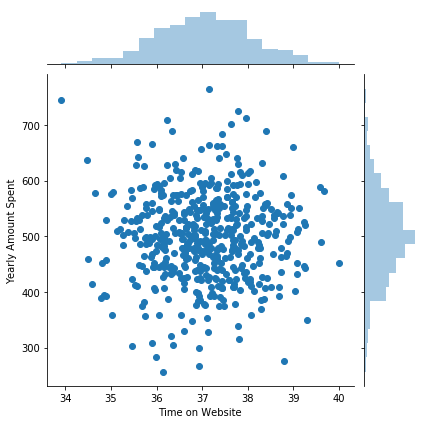

In [6]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=Clientes)

#### Faça o mesmo, mas com a coluna tempo no aplicativo (Time on App). 

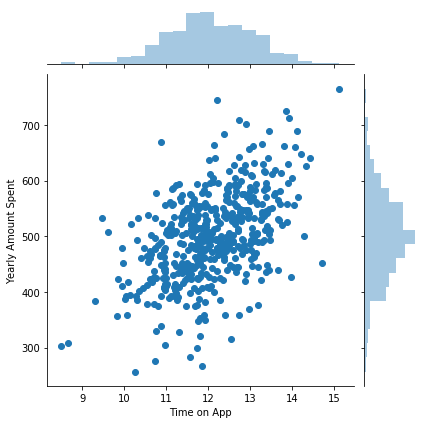

In [7]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=Clientes)

#### Use jointplot criar um lote de caixa hexagonal 2D que compara tempo no aplicativo (Time on App) e o tempo da associação (Length of Membership).

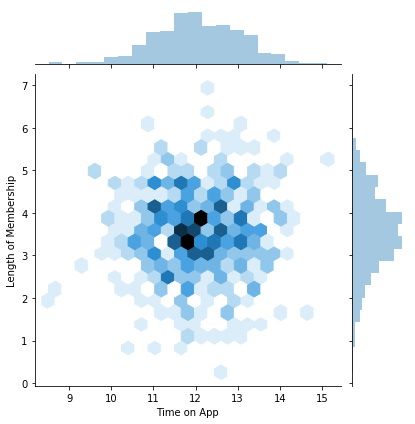

In [8]:
sns.jointplot(x='Time on App', y='Length of Membership', data=Clientes, kind='hex')

#### Vamos explorar esses tipos de relações em todo o conjunto de dados.

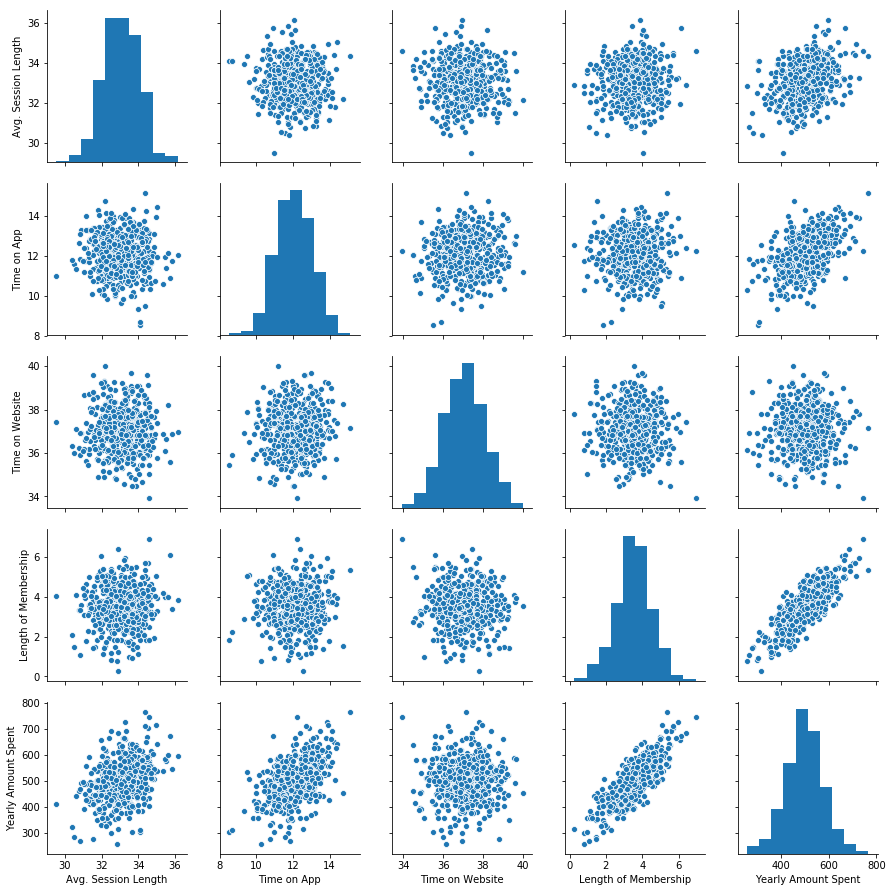

In [9]:
sns.pairplot(Clientes)

#### Baseado neste plot podemos notar que o que parece ser a característica mais correlacionada com o valor anual gasto (Yearly Amount Spent) é o Length of Membership.

## Crie um plot de um modelo linear (usando o lmplot de Seaborn) da quantia anual gasta (Yearly Amount Spent) vs. tempo de associação (Length of Membership)

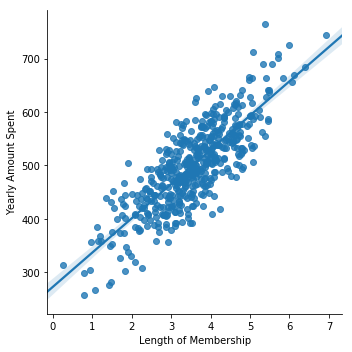

In [10]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=Clientes)

## Treinando e testando os dados

Agora que exploramos um pouco os dados, vamos avançar e dividir os dados em conjuntos de treinamento e teste. Defina uma variável X igual a todas as características numéricas dos clientes e uma variável y igual à coluna Valor anual gasto (Yearly Amount Spent). 

In [12]:
X = Clientes[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [13]:
Y = Clientes['Yearly Amount Spent']

In [14]:
X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [15]:
Y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

#### Use model_selection.train_test_split da sklearn para dividir os dados em conjuntos de treinamento e teste. Defina test_size = 0.3 e random_state = 101 

In [16]:
# Para isso precisamos usar o Scikit Learning
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=101)

In [18]:
X_test.shape[0]

150

In [19]:
X_train.shape[0]

350

In [20]:
Y_test.shape[0]

150

In [21]:
Y_train.shape[0]

350

In [22]:
X_test.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
18,32.187812,14.715388,38.244115,1.516576
361,32.077590,10.347877,39.045156,3.434560
104,31.389585,10.994224,38.074452,3.428860
4,33.330673,12.795189,37.536653,4.446308
156,32.294642,12.443048,37.327848,5.084861


## Treinando o modelo

Agora é hora de treinar nosso modelo em nossos dados de treinamento!

Importe LinearRegression do sklearn.linear_model 

In [23]:
from sklearn.linear_model import LinearRegression

#### Crie uma instância de um modelo LinearRegression () chamado LM. 

In [24]:
LM = LinearRegression()

In [25]:
# Com este objeto LM podemos fitar, treinar e finalmente criar o nosso modelo linear de Machine Learning
LM.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Print os coeficientes do modelo

In [26]:
print('Coefficients: \n', LM.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


## Previsão de dados de teste
Agora que nós ajustamos o nosso modelo, vamos avaliar o seu desempenho ao prever os valores de teste!

Use lm.predict () para prever o conjunto X_test dos dados. 

In [27]:
Predict = LM.predict(X_test)

#### Crie um diagrama de dispersão (scatterplot) dos valores reais de teste em relação aos valores preditos. 

Text(0, 0.5, 'Predicted Y')

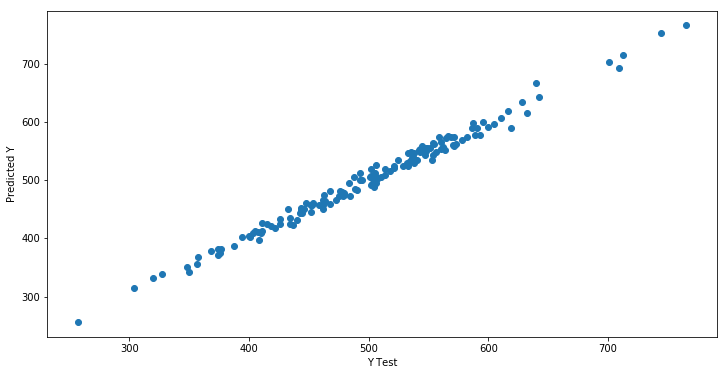

In [30]:
plt.figure(figsize=(12, 6))
plt.scatter(Y_test, Predict)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

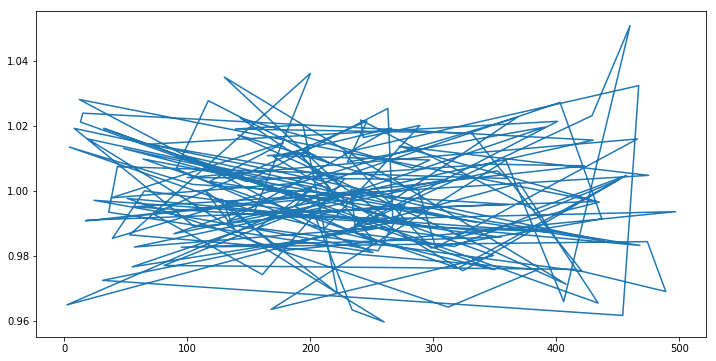

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(Y_test/ Predict)

## Avaliando o Modelo

Vamos avaliar o desempenho do nosso modelo calculando a soma residual dos quadrados e o escore de variância explicado (R ^ 2).

Calcule o erro absoluto médio, o erro quadrado médio e o erro quadrado médio da raiz. Consulte a palestra ou a Wikipédia para as fórmulas.

In [32]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, Predict))
print('MSE:', metrics.mean_squared_error(Y_test, Predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Predict)))

MAE: 7.228148653430828
MSE: 79.81305165097449
RMSE: 8.933815066978635


## Resíduos

Você deve ter obtido um modelo muito bom com um bom ajuste. Vamos explorar rapidamente os resíduos para garantir que tudo esteja bem com os nossos dados.

Trace um histograma dos resíduos e certifique-se de que ele parece normalmente distribuído. Use o seaborn distplot, ou apenas o plt.hist (). 

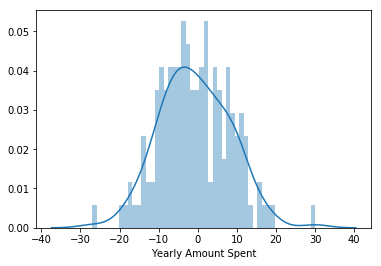

In [34]:
sns.distplot(Y_test - Predict, bins=50)

#### Quando os resíduos estão bem distribuídos em torno do 0 e sem nenhuma cauda longa, o modelo está aprovado

## Conclusão
Ainda desejamos descobrir a resposta à pergunta original, concentramos-nos no desenvolvimento de aplicativos móveis ou de sites? Ou talvez isso realmente não importe, e o tempo como membro é o que é realmente importante? Vamos ver se podemos interpretar os coeficientes para ter uma idéia.

Recrie o quadro de coeficients. 

In [35]:
coeff_DF = pd.DataFrame(LM.coef_, X.columns, columns=['Coefficient'])
coeff_DF

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


#### Como podemos ver acima a cada minuto gasto a mais no App corresponde a um aumento de aproximadamente de 38 dólares a mais por ano gasto na empresa, ao passo que a cada minuto gasto a mais no Website corresponde a um aumento de apenas 0.19 dólares gasto a mais na empresa. Portanto o aplicativo tem um impacto muito maior sobre o site para o bem da empresa.

Interpretando os coeficientes:

**Mantendo todas as outras variáveis constantes**, um aumento de 1 unidade na média de tempo de uso está associado a um aumento de 25,98 dólares totais gastos.

**Mantendo todas as outras variáveis constantes**, um aumento de 1 unidade no tempo gasto no App está associado a um aumento de 38,59 dólares totais gastos.

**Mantendo todas as outras variáveis constantes**, um aumento de 1 unidade no tempo no site está associado a um aumento de 0,19 dólares em dólares.

**Mantendo todas as outras variáveis constantes**, um aumento de 1 unidade no tempo de Associação está associado a um aumento de 61,27 dólares em dólares.

## Mas para o bem da empresa notamos que o tempo médio de fidelidade do cliente com a empresa gera aproximadamente o dobro da influência que o tempo no aplicativo gera. Portanto, o foco deve ser maior em 'Length of Membership'. 